# HW1               
     Yuguo yang
     9-11-2019

# Problem1

In [20]:
import numpy as np

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import scipy.stats as g

# a.

In [7]:
ap=pd.read_csv("vitoria2006.csv")

In [8]:
# select rows by condition (total price greater than 400,000 euros) 

In [9]:
ap2=ap[ap.totalprice>400000]

In [10]:
# count numbers

In [11]:
number=len(list(ap2))

In [13]:
number

15

# b.

In [16]:
# show column totalprice

In [17]:
tp=ap['totalprice']

In [18]:
# histogram of relative frequencies of totalprice

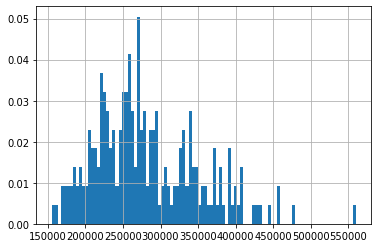

In [21]:
tp.hist(bins=100,weights=np.zeros_like(tp)+1/tp.size )

In [22]:
# normal density curve

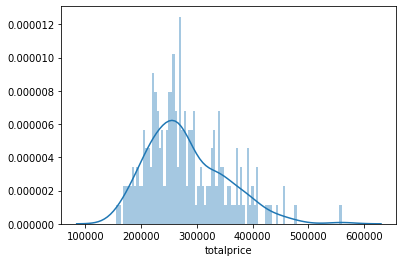

In [23]:
sns.distplot(tp,hist=True,bins=100)

In [24]:
# variable a: the mean of the totalprice 
# variable b: the std of the totalprice

In [25]:
a=tp.mean()
b=tp.std()

In [26]:
# calculate the probability that the total price of apartment less than 300000 euros pl

In [30]:
pl=g.norm(a,b).cdf(300000)

In [31]:
# probability that the total price of apartment exceeds 300000 pe

In [32]:
pe=1-pl

In [33]:
pe

0.39054215697577643

# c.

In [35]:
# show columns of all numerical variables

In [36]:
h=ap[['totalprice','area','age','floor','rooms','toilets','garage','elevator','storage']]

In [42]:
# calculate covariance matrix

In [44]:
cov=h.cov()
cov

,totalprice,area,age,floor,rooms,toilets,garage,elevator,storage
totalprice,4.802276e+09,1.162639e+06,-275569.809042,4306.929479,23103.901095,23829.329737,16364.512574,14244.123620,7536.746579
area,1.162639e+06,4.298508e+02,-15.815009,3.600908,8.392216,6.484930,3.286218,3.291590,1.274237
age,-2.755698e+05,-1.581501e+01,213.031243,-2.522175,-0.766034,-2.049338,-1.408532,-2.402951,-1.581744
floor,4.306929e+03,3.600908e+00,-2.522175,4.524077,0.175538,0.110980,-0.029214,0.172240,-0.103708
rooms,2.310390e+04,8.392216e+00,-0.766034,0.175538,0.402317,0.133514,0.058893,0.090052,0.008456
toilets,2.382933e+04,6.484930e+00,-2.049338,0.110980,0.133514,0.250116,0.102313,0.090263,0.044476
garage,1.636451e+04,3.286218e+00,-1.408532,-0.029214,0.058893,0.102313,0.203293,0.049296,0.028622
elevator,1.424412e+04,3.291590e+00,-2.402951,0.172240,0.090052,0.090263,0.049296,0.161840,0.034668
storage,7.536747e+03,1.274237e+00,-1.581744,-0.103708,0.008456,0.044476,0.028622,0.034668,0.165476


In [45]:
#calculate correlation matrix

In [46]:
corrs=h.corr()
corrs

,totalprice,area,age,floor,rooms,toilets,garage,elevator,storage
totalprice,1.000000,0.809213,-0.272450,0.029220,0.525627,0.687571,0.523742,0.510939,0.267358
area,0.809213,1.000000,-0.052262,0.081656,0.638166,0.625425,0.351541,0.394643,0.151086
age,-0.272450,-0.052262,1.000000,-0.081243,-0.082745,-0.280751,-0.214034,-0.409242,-0.266408
floor,0.029220,0.081656,-0.081243,1.000000,0.130113,0.104329,-0.030462,0.201292,-0.119861
rooms,0.525627,0.638166,-0.082745,0.130113,1.000000,0.420892,0.205930,0.352912,0.032771
toilets,0.687571,0.625425,-0.280751,0.104329,0.420892,1.000000,0.453729,0.448640,0.218621
garage,0.523742,0.351541,-0.214034,-0.030462,0.205930,0.453729,1.000000,0.271774,0.156053
elevator,0.510939,0.394643,-0.409242,0.201292,0.352912,0.448640,0.271774,1.000000,0.211845
storage,0.267358,0.151086,-0.266408,-0.119861,0.032771,0.218621,0.156053,0.211845,1.000000


# d.

In [48]:
# scatter plot of totalprice and area (also the regression line)

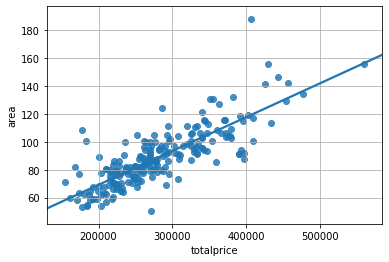

In [56]:
plt.scatter(ap['totalprice'],ap['area'],s=0.1)
plt.xlabel('totalprice')
plt.ylabel('area')
plt.grid()
sns.regplot('totalprice','area',ap,ci=None)

In [57]:
# from the scatter plot, the outlier is the only dot which the area is larger than 180
# find row number, totalprice and area of the largest outlier 

In [63]:
b=ap[ap.area>180][['totalprice','area']]
b

,totalprice,area
30,407000.0,187.910004


In [64]:
# row number

In [65]:
number=b.index[0]
number

30

In [66]:
# totalprice

In [68]:
totalprice=b.at[number,'totalprice']
totalprice

407000.0

In [69]:
# area

In [70]:
area=b.at[number,'area']
area

187.91000369999998

# e.

In [71]:
# combine category 2A and 2B to 2 (same for 3A and 3B, 4A and 4B, 5A and 5B)

In [72]:
for i in range(218):
    ap.at[i,'category']=ap.at[i,'category'][0]

In [74]:
# median totalprice of the apartment by category 

In [75]:
pitable=ap.pivot_table('totalprice',index='category',aggfunc=np.median)
pitable

,totalprice
category,
2,345500.0
3,279000.0
4,224000.0
5,183000.0
